#### Build a prediction model for Salary_hike

### Importing Libraries and reading the data.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import norm
import statsmodels.formula.api as smf


In [2]:
dataset=pd.read_csv(r"C:\Users\HP\Desktop\Python\Assignment\Simple Linear Regression\Salary_Data.csv")

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### EDA

In [4]:
dataset.head()  # Gives the first 5 rows of the table.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info() # Gives the information about column header, null values and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.shape  # Gives the no. of rows and columns.

(30, 2)

In [7]:
dataset.describe()  # Gives the count, mean, std. deviation, min-max,25%-50%-75% quantile range

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Correlation Analysis

In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##### The correlation of variable with itself is 1 i.e.  YearsExperience with YearsExperience and Salary with Salary is 1. 
##### The correlation of YearsExperience with Salary is 0.978242.

### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

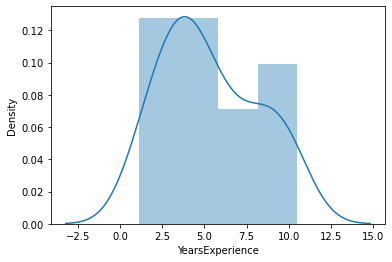

In [9]:
sns.distplot(dataset['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience'>

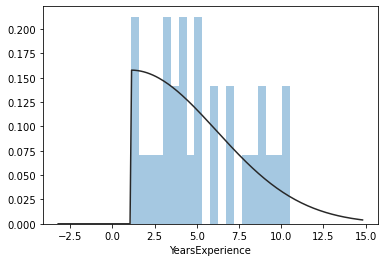

In [10]:
sns.distplot(dataset['YearsExperience'], fit=skewnorm, bins=20, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

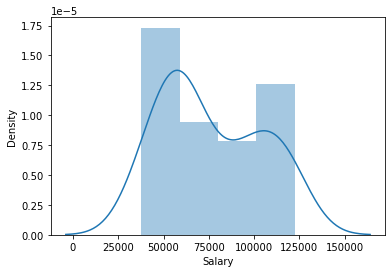

In [11]:
sns.distplot(dataset['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

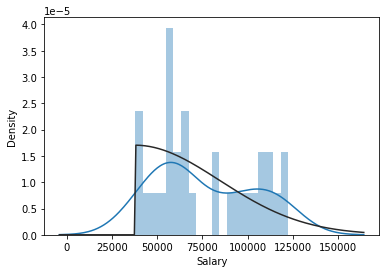

In [12]:
sns.distplot(dataset['Salary'], fit=skewnorm, bins=20, kde=True)

### Fitting a Linear Regression Model

In [13]:
model = smf.ols("Salary~YearsExperience",data = dataset).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

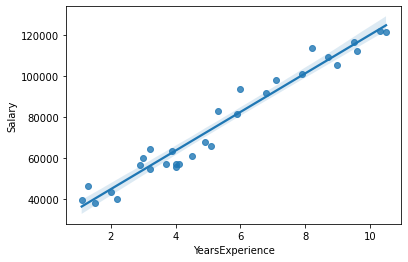

In [14]:
sns.regplot(x="YearsExperience", y="Salary", data=dataset)

### Model Testing

In [15]:
# Finding Coefficient Parameters
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
# Finding pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [17]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### Predict for new data point

In [18]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary


54142.087162

In [19]:

# Automatic Prediction for say 3 & 5 Years Experience 

In [20]:
new_data=pd.Series([3,5])
new_data


0    3
1    5
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,3
1,5


In [22]:

model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64